# Question 1

In [1]:
install.packages("readr")
devtools::install_github("homerhanumat/tigerstats",build_vignettes=TRUE)

Installation du package dans 'C:/Users/David/AppData/Roaming/SPB_Data/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'readr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problème lors de la copie de C:\Users\David\AppData\Roaming\SPB_Data\R\win-library\4.1\00LOCK\readr\libs\x64\readr.dll vers C:\Users\David\AppData\Roaming\SPB_Data\R\win-library\4.1\readr\libs\x64\readr.dll: Permission denied"
Warning message:
"restored 'readr'"



The downloaded binary packages are in
	C:\Users\David\AppData\Local\Temp\RtmpeSf9HQ\downloaded_packages


Skipping install of 'tigerstats' from a github remote, the SHA1 (17067f7e) has not changed since last install.
  Use `force = TRUE` to force installation



In [73]:
library(readr)
library(tigerstats)
library(ggplot2)
library(gridExtra)

In [3]:
cd <- read_tsv("clinical-data.tsv") 
spec(cd)
summary(cd)


Rows: 136 Columns: 12
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: "\t"
chr (5): SMPLID, SMPTHNTS, COHORT, SUBJID, IMGURL
dbl (7): SEX, AGE, HGHT, WGHT, BMI, TRISCHD, DTHHRDY

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  SMPLID = col_character(),
  SEX = col_double(),
  AGE = col_double(),
  HGHT = col_double(),
  WGHT = col_double(),
  BMI = col_double(),
  SMPTHNTS = col_character(),
  COHORT = col_character(),
  TRISCHD = col_double(),
  DTHHRDY = col_double(),
  SUBJID = col_character(),
  IMGURL = col_character()
)

    SMPLID               SEX            AGE             HGHT      
 Length:136         Min.   :1.00   Min.   :21.00   Min.   :58.00  
 Class :character   1st Qu.:1.00   1st Qu.:30.00   1st Qu.:66.00  
 Mode  :character   Median :1.00   Median :38.00   Median :68.00  
                    Mean   :1.36   Mean   :37.53   Mean   :68.18  
                    3rd Qu.:2.00   3rd Qu.:45.25   3rd Qu.:71.00  
                    Max.   :2.00   Max.   :49.00   Max.   :76.00  
      WGHT            BMI          SMPTHNTS            COHORT         
 Min.   : 92.0   Min.   :18.58   Length:136         Length:136        
 1st Qu.:159.8   1st Qu.:24.27   Class :character   Class :character  
 Median :184.8   Median :27.75   Mode  :character   Mode  :character  
 Mean   :182.9   Mean   :27.55                                        
 3rd Qu.:205.2   3rd Qu.:31.07                                        
 Max.   :264.0   Max.   :34.86                                        
    TRISCHD          DTHHRDY      

## 1.1 : Distribution of the clinical variables

### 1) Sex

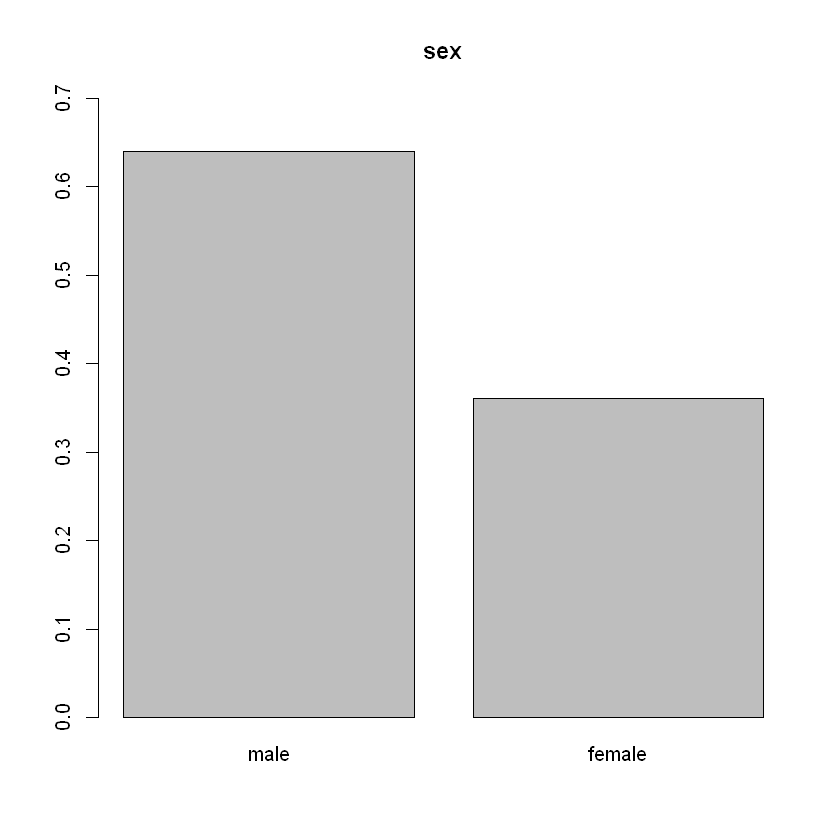

In [32]:
barplot(prop.table(table(data.frame(cd$SEX))), main="sex", names.arg=c("male","female"), ylim=c(0.0,0.7))

### 2) Age

 min Q1 median    Q3 max     mean       sd   n missing
  21 30     38 45.25  49 37.52941 8.611741 136       0


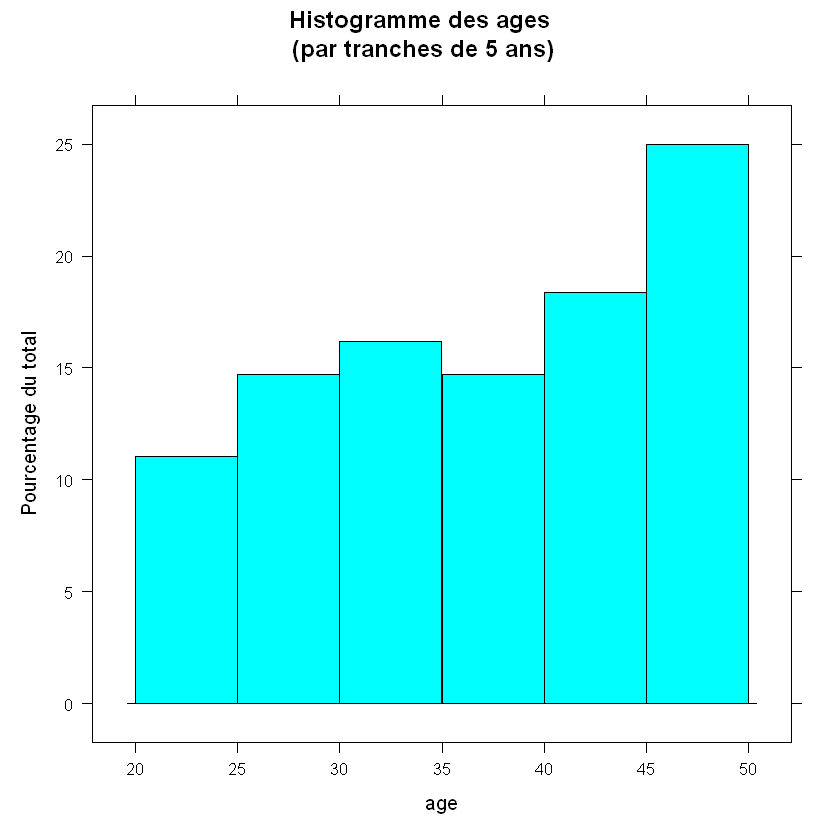

In [16]:
histogram(data.frame(cd$AGE)[,1],main="Histogramme des ages\n (par tranches de 5 ans)", xlab="age",breaks=6)
print(favstats(data.frame(cd$AGE)[,1]))

### 3) Tailles

 min Q1 median Q3 max     mean      sd   n missing
  58 66     68 71  76 68.18478 3.89909 136       0


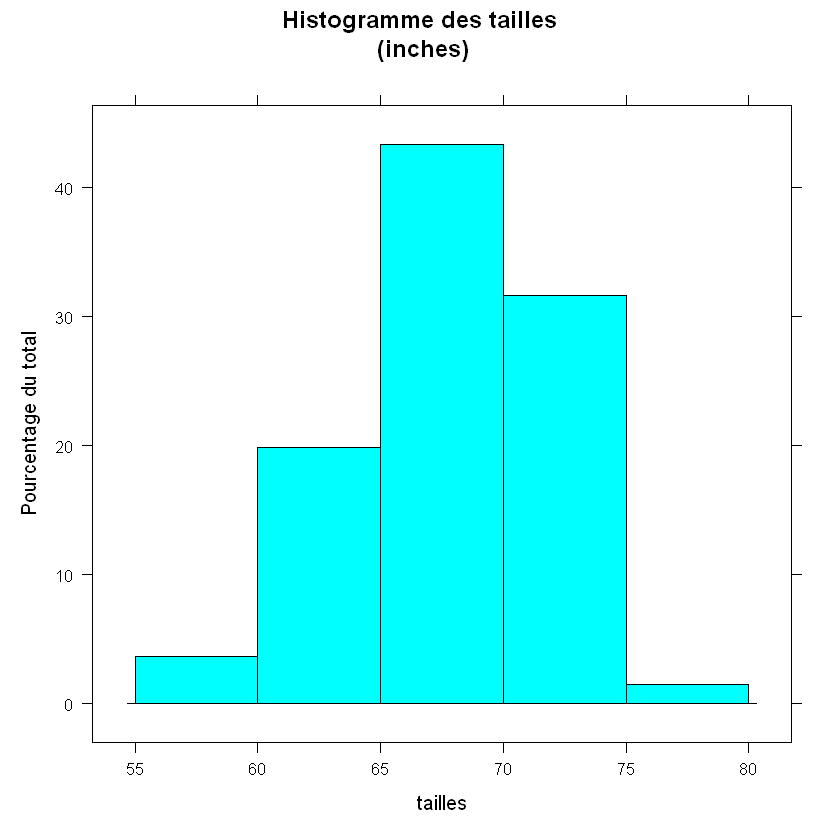

In [15]:
histogram(data.frame(cd$HGHT)[,1],main="Histogramme des tailles\n (inches)", xlab="tailles",breaks=6)
print(favstats(data.frame(cd$HGHT)[,1]))

### 4) Poids

 min     Q1 median     Q3 max     mean       sd   n missing
  92 159.75  184.8 205.25 264 182.9454 33.58838 136       0


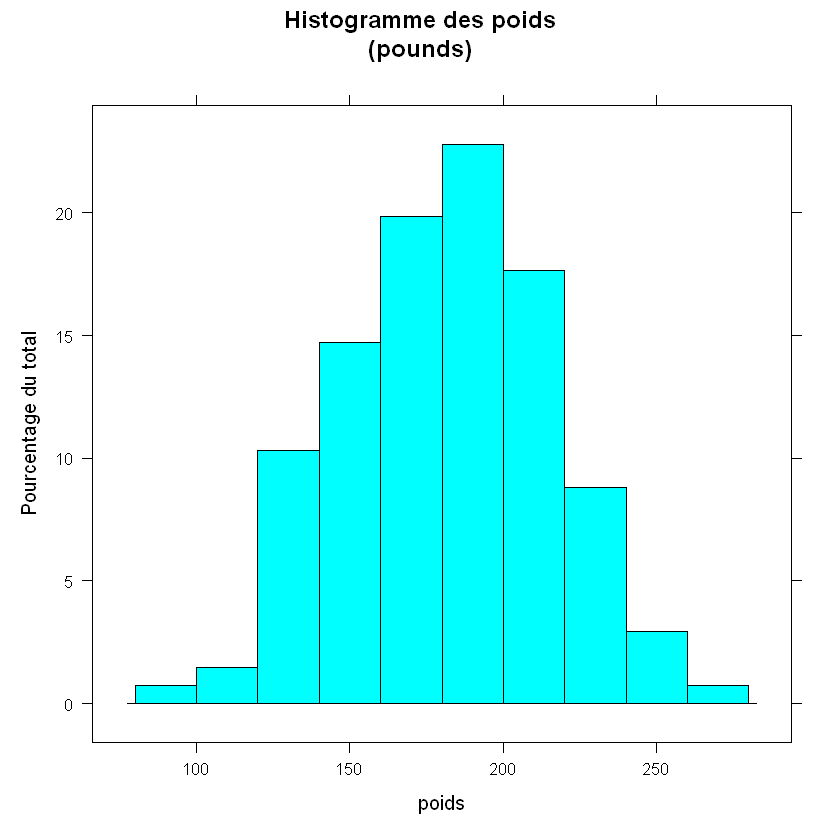

In [19]:
histogram(data.frame(cd$WGHT)[,1],main="Histogramme des poids\n (pounds) ", xlab="poids", breaks=7)
print(favstats(data.frame(cd$WGHT)[,1]))

### 5) Indice de masse corporelle

   min      Q1 median      Q3   max     mean       sd   n missing
 18.58 24.2675  27.75 31.0725 34.86 27.55471 3.925531 136       0


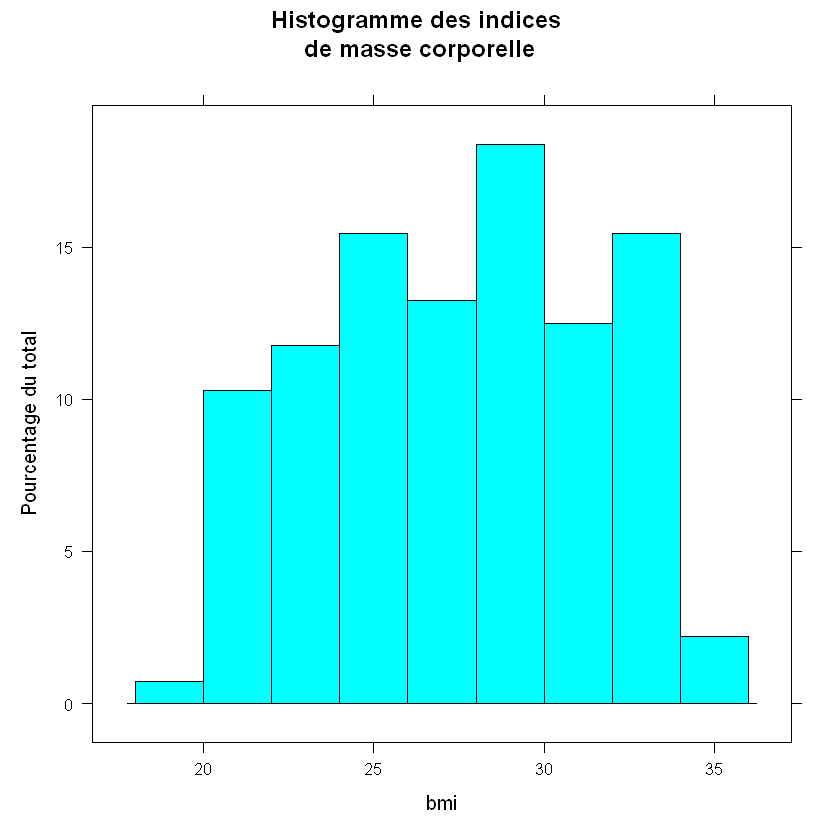

In [27]:
histogram(data.frame(cd$BMI)[,1],main="Histogramme des indices \n de masse corporelle ", xlab="bmi", breaks=6)
print(favstats(data.frame(cd$BMI)[,1]))

### 6) Cohorte

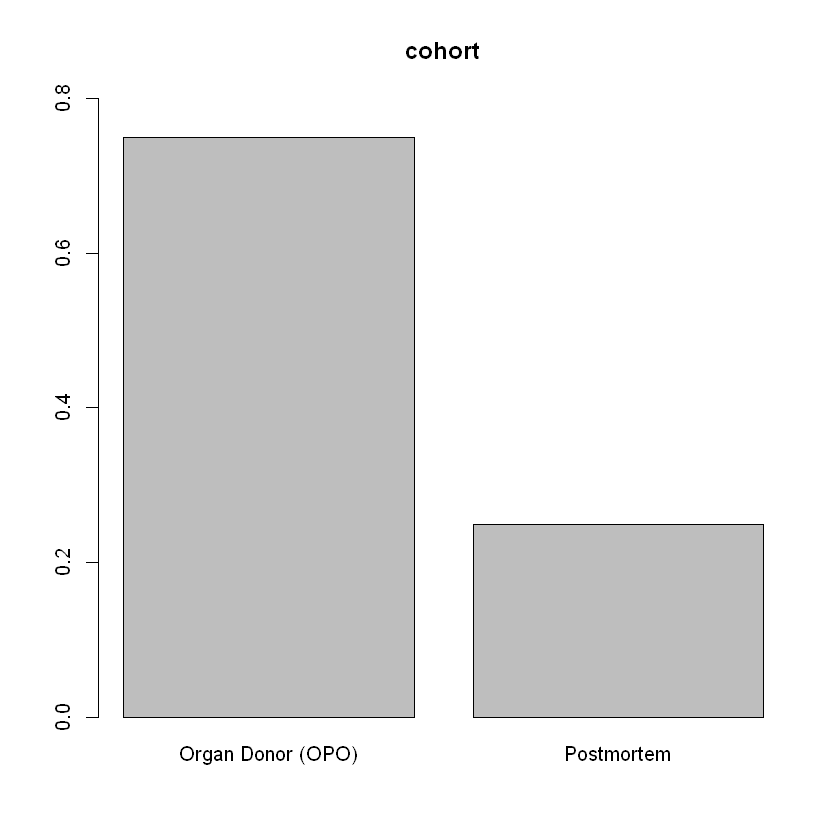

In [31]:
barplot(prop.table(table(data.frame(cd$COHORT))), main="cohort", ylim=c(0.0,0.8))

### 7) Temps ischémique

 min   Q1 median     Q3  max     mean      sd   n missing
  15 61.5    209 474.25 1641 382.5588 411.018 136       0


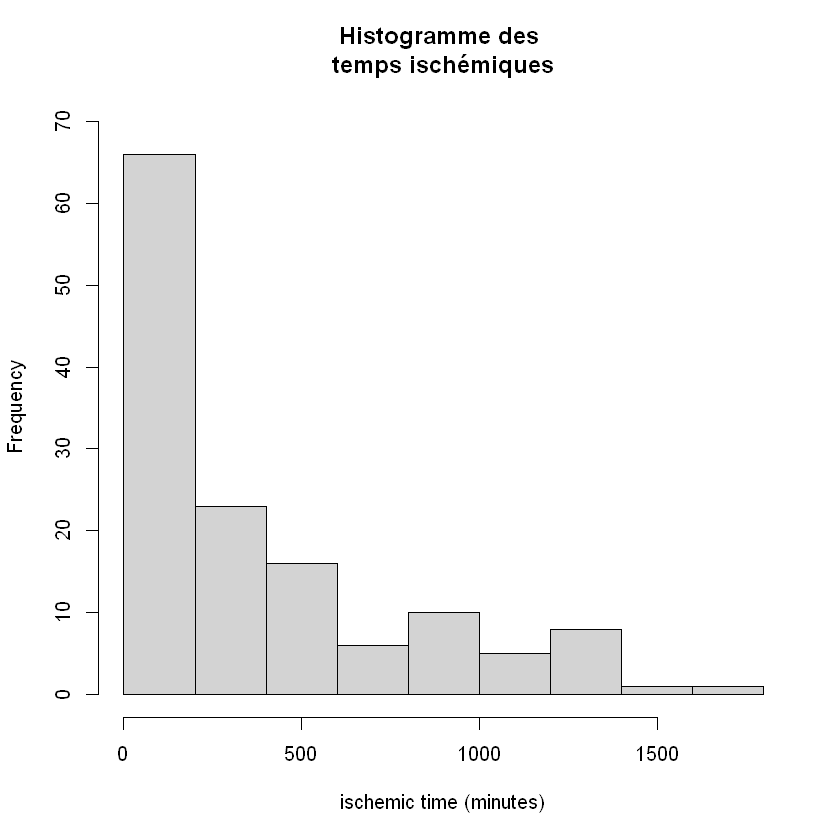

In [42]:
hist(data.frame(cd$TRISCHD)[,1],main="Histogramme des \n temps ischémiques ", xlab="ischemic time (minutes)", ylim=c(0,70))
print(favstats(data.frame(cd$TRISCHD)[,1]))

### 8) Echelle de Hardy

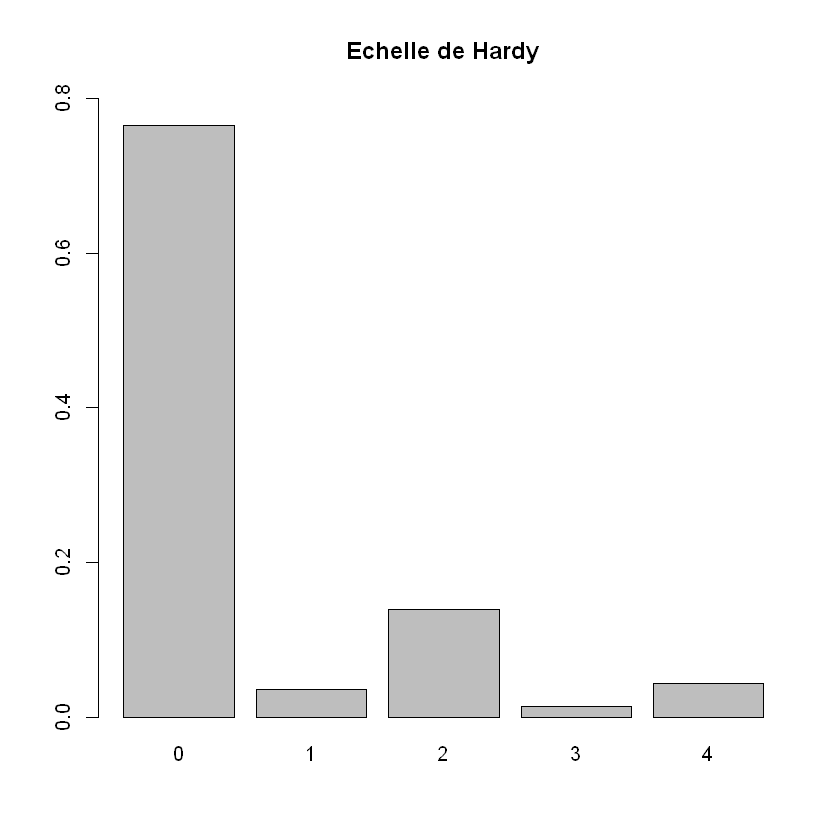

In [43]:
barplot(prop.table(table(data.frame(cd$DTHHRDY))), main="Echelle de Hardy", ylim=c(0.0,0.8))

## 1.2 : Correlation between variables

### Liaisons entre les variables "démographiques"
#### Sexe = variable catégorielle --> comparaison visuelle avec boxplot 

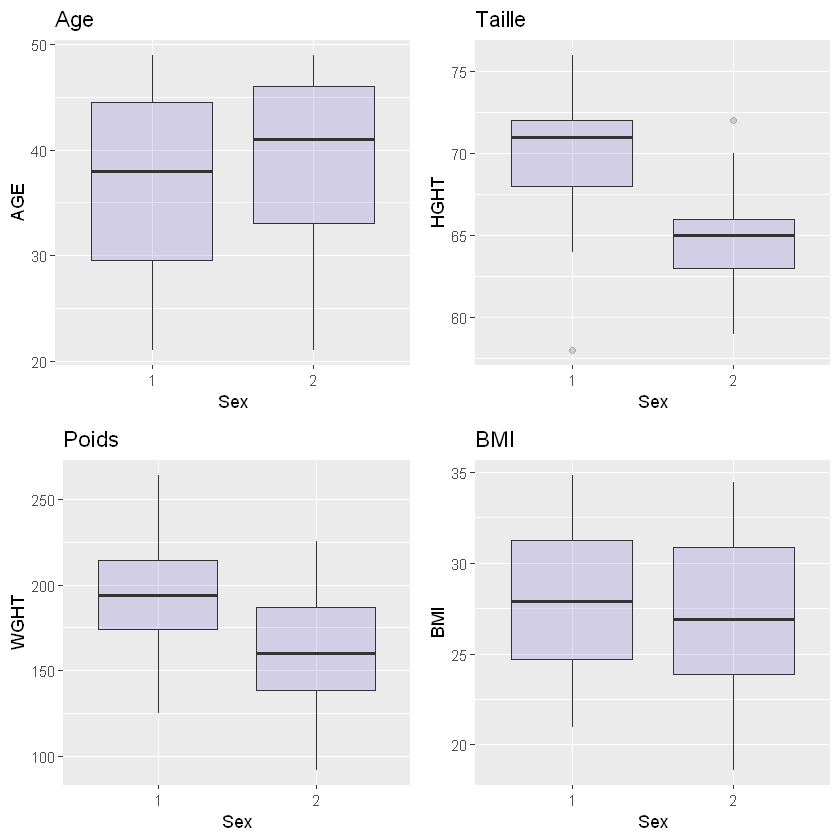

In [77]:


# Boxplots avec les différentes variables en fct de sex
p1 <- ggplot(cd,aes(x=as.factor(SEX), y=AGE)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + ggtitle("Age") + 
    xlab("Sex")
p2 <- ggplot(cd,aes(x=as.factor(SEX), y=HGHT)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Sex") + ggtitle("Taille")

p3 <- ggplot(cd,aes(x=as.factor(SEX), y=WGHT)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Sex") + ggtitle("Poids")
p4 <- ggplot(cd,aes(x=as.factor(SEX), y=BMI)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Sex") + ggtitle("BMI")

grid.arrange(p1,p2,p3,p4, ncol=2)

#### Vérification avec tests de Mann-Whitney

In [96]:
# 2 nouveaux dataframes : hommes et femmes
hommes <- filter(cd, SEX == 1)
femmes <- filter(cd, SEX == 2)

#unpaired two-samples Wilcoxon test =  Wilcoxon rank sum test = Mann-Whitney test
# Calcul des tests de Mann-Whitney pour les différentes variables :

w_age <- wilcox.test(hommes$AGE, femmes$AGE)$p.value
w_hght <- wilcox.test(hommes$HGHT, femmes$HGHT)$p.value
w_wght <- wilcox.test(hommes$WGHT, femmes$WGHT)$p.value
w_bmi <- wilcox.test(hommes$BMI, femmes$BMI)$p.value

print(paste('p-value for age : ', toString(w_age)))
print(paste('p-value for hght : ', toString(w_hght)))
print(paste('p-value for wght : ', toString(w_wght)))
print(paste('p-value for bmi : ', toString(w_bmi)))


## On constate que les variables du poids et de la taille ne sont clairement pas indépendante du sexe, mais on ne peut pas 
## tirer cette conclusion pour l'age et l'indice de masse corporelle, ce qui correspond à ce qu'on observait sur les boxplots

[1] "p-value for age :  0.131321452047474"
[1] "p-value for hght :  3.51914176038072e-16"
[1] "p-value for wght :  1.48960430486491e-07"
[1] "p-value for bmi :  0.377965307143104"
